In [1]:
import pandas as pd
browsing_data = pd.read_csv('../static/user_browsing_hours.csv', usecols = ['username', 'hour'])
browsing_data.head()

username    hour
0      Taringa  14.798
1   alpaquitay  13.754
2    nuevorden  15.067
3       josezu  10.362
4  zendostrike  13.220

In [2]:
%pip install seaborn
%pip install ckwrap

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring instal

<Axes: >

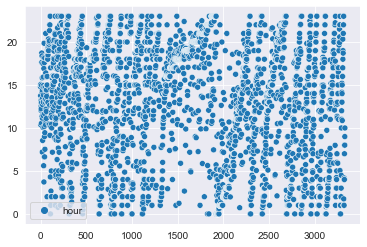

In [3]:
import seaborn as sns
sns.scatterplot(data = browsing_data)

In [4]:
# make each entry unique by adding an insignificant random number

from random import random

def random_text(size: int = 6) -> str:
    return str(random()).split(".")[1][:size]

def _add_random(x: float) -> float:
    _new = str(x) + random_text()
    return float(_new)

browsing_data["hour_random"] = [_add_random(value) for value in browsing_data["hour"].values]

In [5]:
browsing_data

username    hour  hour_random
0             Taringa  14.798    14.798541
1          alpaquitay  13.754    13.754209
2           nuevorden  15.067    15.067817
3              josezu  10.362    10.362821
4         zendostrike  13.220    13.228720
...               ...     ...          ...
3326         paolaksj   8.000     8.018281
3327        Crisnelam   8.000     8.032276
3328  robertorojas200   8.000     8.059106
3329           jowica   9.000     9.001540
3330     Eddiecaste76  10.000    10.097203

[3331 rows x 3 columns]

<Axes: xlabel='hour', ylabel='hour_random'>

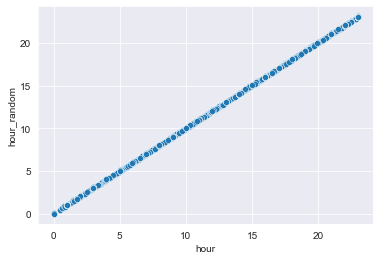

In [6]:
sns.scatterplot(data = browsing_data, x='hour', y='hour_random')

In [7]:
username_hour_mapping = browsing_data[["username", "hour_random"]].set_index('username').to_dict()["hour_random"]

In [8]:
username_hour_mapping

{'Taringa': 14.798540753,
 'alpaquitay': 13.754209153,
 'nuevorden': 15.067817157,
 'josezu': 10.362820579,
 'zendostrike': 13.22872004,
 'donoscarbonilla': 12.04989903,
 'AndreaVLK': 12.542745025,
 'enivid': 12.224778552,
 'Ale_Sabater': 13.187544666,
 'Nobody': 12.912450803,
 'FanFani': 10.549765354,
 'Kira9': 14.963638335,
 'Holly': 17.637425005,
 'oskr04': 18.721515373,
 'elitrimarchi': 17.627845403,
 'RamaSalemme': 11.361999055,
 'marinc3': 18.383819209,
 'iovreche': 14.17213089,
 'dist159': 15.82957995,
 'LaPipol': 7.197558253,
 'Maxlancer': 14.364614498,
 'DebyMagallanes': 11.12543609,
 'Pipo1995': 13.463773267,
 'SoyBarroar': 8.547287921,
 'mabgia': 12.704147375,
 'Chabeli_Espino1': 11.55409653,
 'andy_cr': 17.501236088,
 'christhoph': 10.063844119,
 'johndvann': 11.447340935,
 'alcriorne': 13.061131029,
 'DaniAnantes': 13.021614,
 'UniversoGIA': 15.933947664,
 'archivodeautos': 13.834583011,
 'Gosia': 14.934263695,
 'six_to': 5.606237315,
 'francosaraceni': 18.181775178,
 'Ner

In [9]:
# check if mapping is unique

len(username_hour_mapping) == len(set(username_hour_mapping.values()))

True

In [10]:
# create hour-username mapping

hour_username_mapping = {value:key for key, value in username_hour_mapping.items()}

In [11]:
import ckwrap
import numpy as np

In [12]:
field = np.array(list(username_hour_mapping.values()))
n_clusters = 20
km = ckwrap.ckmeans(field, n_clusters)

In [13]:
km.centers

array([ 0.68192227,  2.02513905,  3.07354881,  4.11255003,  5.52302186,
        7.39484986,  8.98442825, 10.66448419, 11.97604337, 13.02041612,
       14.05571867, 15.04696758, 16.03152908, 17.02585847, 18.0442716 ,
       19.04954091, 20.04592104, 21.03459643, 22.03712838, 23.02620404])

In [14]:
buckets = [[] for _ in range(n_clusters)]

In [15]:
for i in range(len(field)):
    buckets[km.labels[i]].append(field[i])

In [16]:
buckets

[[0.0573983,
  1.0689196,
  1.0766729,
  0.771547404,
  1.0410802,
  0.0141826,
  0.0830542,
  0.0615954,
  0.0950494,
  1.0517299,
  1.0575518,
  1.0069669,
  0.0997852,
  0.48166198,
  1.0055853,
  0.0336774,
  0.0228709,
  0.0132312,
  0.0835408,
  1.0671796,
  1.0255741,
  1.0559857,
  1.0125126,
  1.0997524,
  1.0453975,
  1.0472314,
  1.0077083,
  0.0462183,
  1.042956597,
  0.0572167,
  0.0962531,
  0.0141474,
  0.789858754,
  1.0520552,
  1.0274846,
  1.0463267,
  1.0872009,
  1.0222184,
  1.0904947,
  1.0962549,
  0.0249442,
  0.0454017,
  0.0070069,
  0.0442469,
  0.081819,
  0.0552842,
  0.0129689,
  1.0999536,
  1.076115,
  1.0879614,
  1.0682761,
  0.0579512,
  0.0756123,
  0.0459256,
  0.008629,
  0.0824263,
  0.0936628,
  0.0730459,
  0.0077318,
  0.0195345,
  0.0574429,
  0.987054675,
  0.0093004,
  1.0626043,
  1.333129008,
  0.571170686,
  1.25823795,
  1.0640691,
  1.006208,
  1.0944779,
  1.050341,
  1.0478157,
  1.0724614,
  1.073543,
  1.0330795,
  1.23167564,
  1

In [17]:
members = [[hour_username_mapping[hour] for hour in bucket] for bucket in buckets]

In [18]:
members

[['Jeeper1971',
  'Mhibou',
  'Camii',
  'dup_ngh_sick',
  'DiegoMatiz',
  'diego',
  'teresa',
  'DiegoSP',
  'Emysshe_15',
  'Lisandro',
  'esteredondo1387',
  'Nicolax',
  'fakundoa',
  'Madera',
  'SHIVER',
  'eveche_1',
  'Brunesky',
  'Krakitos',
  'axel33',
  'Skankao',
  'sofimarg',
  'emamyrkur',
  'hectorbo',
  'Danibrach',
  '48future',
  'jjjero',
  'RATOR21JP21',
  'znake94',
  'Harbeen',
  'EricK',
  '_TARINGUER0_',
  'alonsex168',
  'Wilson303',
  'JuanMax20',
  'guillermofontes',
  'jaftdelgado',
  'yhoshi123',
  'DVNIIEL',
  'Mwah512',
  'paquin05',
  'valencia0',
  'elmemesinso',
  'Tacaro',
  'Igna64',
  'Lutherking',
  'iovlabs',
  'Cleopatra',
  'RitaFerrando',
  'candee99',
  'bianci',
  'cuisegalactico',
  'Libertad',
  'OliviaCalfe',
  'SolPerez',
  'tomicatalano97',
  'MarioGlade',
  'catilalocas',
  'MecanicoJose',
  'julchia',
  'sinapellido_max',
  'bartos81',
  'daasmiller',
  'juancek',
  'matute140885',
  'cocoliso6549778',
  'Sebamrc1010',
  'jimosilvaor

In [19]:
len(members[0])

212

In [20]:
len(members[1])

179

In [21]:
len(members[2])

128

In [22]:
len(members[3])

118

In [23]:
len(members[4])

129

<Axes: >

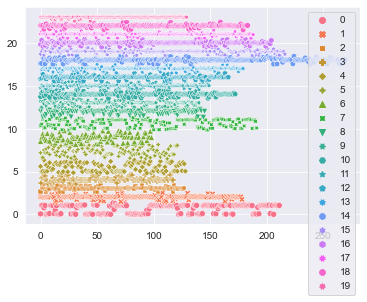

In [24]:
sns.scatterplot(data = buckets)

In [25]:
trial_users = [
    "oskr04",
    "Severus",
    "FanFani",
    "alcriorne",
    "donoscarbonilla",
    "kira9",
    "SoyBarroar",
    "danantes",
    "andy_cr",
    "AndreaVLK",
    "Nobody",
    "alpaquitay",
    "Chabeli_Espino1",
    "Maxlancer",
    "taringa",
    "Joha3008"
]

In [26]:
columns = ["Cluster Number", "Cluster Center [avg. hour of day online]", "Cluster range hour of day online", "Cluster members"]

In [27]:
def pad_str(i):
    i = str(i)
    return i if len(i) == 2 else f"0{i}"

def format_time(_time: float) -> str:
    _hours = int(_time)
    _float = _time - _hours
    _min = int(_float * 60)
    return "{}:{} UTC".format(pad_str(_hours), pad_str(_min))

In [28]:
cluster_numbers = [i for i in range(n_clusters)]
cluster_centers = [format_time(km.centers[i]) for i in range(n_clusters)]
cluster_ranges = ["{} - {}".format(format_time(min(buckets[i])), format_time(max(buckets[i]))) for i in range(n_clusters)]
cluster_members = [", ".join([u for u in trial_users if u in members[i]]) for i in range(n_clusters)]

dataset = [
    [cluster_numbers[i], cluster_centers[i], cluster_ranges[i], cluster_members[i]] for i in range(n_clusters)
]

In [29]:
dataset

[[0, '00:40 UTC', '00:00 UTC - 01:19 UTC', ''],
 [1, '02:01 UTC', '01:23 UTC - 02:32 UTC', ''],
 [2, '03:04 UTC', '02:34 UTC - 03:34 UTC', ''],
 [3, '04:06 UTC', '03:35 UTC - 04:43 UTC', ''],
 [4, '05:31 UTC', '04:49 UTC - 06:25 UTC', ''],
 [5, '07:23 UTC', '06:29 UTC - 08:10 UTC', ''],
 [6, '08:59 UTC', '08:11 UTC - 09:48 UTC', 'SoyBarroar'],
 [7, '10:39 UTC', '09:50 UTC - 11:18 UTC', 'FanFani'],
 [8, '11:58 UTC', '11:20 UTC - 12:28 UTC', 'donoscarbonilla, Chabeli_Espino1'],
 [9, '13:01 UTC', '12:30 UTC - 13:31 UTC', 'alcriorne, AndreaVLK, Nobody'],
 [10, '14:03 UTC', '13:32 UTC - 14:32 UTC', 'alpaquitay, Maxlancer'],
 [11, '15:02 UTC', '14:34 UTC - 15:31 UTC', 'Severus'],
 [12, '16:01 UTC', '15:34 UTC - 16:31 UTC', ''],
 [13, '17:01 UTC', '16:32 UTC - 17:31 UTC', 'andy_cr'],
 [14, '18:02 UTC', '17:33 UTC - 18:32 UTC', ''],
 [15, '19:02 UTC', '18:32 UTC - 19:32 UTC', 'oskr04'],
 [16, '20:02 UTC', '19:33 UTC - 20:31 UTC', 'Joha3008'],
 [17, '21:02 UTC', '20:35 UTC - 21:31 UTC', ''],
 [

In [30]:
trial_df = pd.DataFrame(data=dataset, columns=columns)

In [31]:
trial_df.head()

Cluster Number Cluster Center [avg. hour of day online]  \
0               0                                00:40 UTC   
1               1                                02:01 UTC   
2               2                                03:04 UTC   
3               3                                04:06 UTC   
4               4                                05:31 UTC   

  Cluster range hour of day online Cluster members  
0            00:00 UTC - 01:19 UTC                  
1            01:23 UTC - 02:32 UTC                  
2            02:34 UTC - 03:34 UTC                  
3            03:35 UTC - 04:43 UTC                  
4            04:49 UTC - 06:25 UTC

In [32]:
trial_df.to_csv("user_distribution_hours_online.csv")